# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import scipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list

In [3]:
# Set the API base URL

api_key = weather_api_key

url  =f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url+city

   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dinan
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | ahau
City not found. Skipping...
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | vorgashor
Processing Record 11 of Set 1 | hailar
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | ternate
Processing Record 18 of Set 1 | makokou
Processing Record 19 of Set 1 | pandan
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | leirvik
Processing Record 22 of Set 1 | college
Processing Re

Processing Record 39 of Set 4 | chengde
Processing Record 40 of Set 4 | iwanai
Processing Record 41 of Set 4 | gorno-altaysk
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | bushland beach
City not found. Skipping...
Processing Record 44 of Set 4 | tralee
Processing Record 45 of Set 4 | zouerate
Processing Record 46 of Set 4 | fort mcmurray
Processing Record 47 of Set 4 | santana
Processing Record 48 of Set 4 | isafjordur
Processing Record 49 of Set 4 | saeby
Processing Record 0 of Set 5 | tual
Processing Record 1 of Set 5 | kamaishi
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | tamanrasset
Processing Record 5 of Set 5 | kenai
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | portland
Processing Record 8 of Set 5 | tyukhtet
Processing Record 9 of Set 5 | robertsport
Processing Record 10 of Set 5 | afaahiti
Processing Record 11 of Set 5 | conception bay south
Processing Record 12 of S

Processing Record 34 of Set 8 | calolbon
Processing Record 35 of Set 8 | novodvinsk
Processing Record 36 of Set 8 | redon
Processing Record 37 of Set 8 | peniche
Processing Record 38 of Set 8 | nuku'alofa
Processing Record 39 of Set 8 | ridder
Processing Record 40 of Set 8 | higuera de zaragoza
Processing Record 41 of Set 8 | khoyniki
Processing Record 42 of Set 8 | puerto deseado
Processing Record 43 of Set 8 | vinton
Processing Record 44 of Set 8 | sambava
Processing Record 45 of Set 8 | puerto baquerizo moreno
Processing Record 46 of Set 8 | zav'yalovo
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | arraial do cabo
Processing Record 49 of Set 8 | williston
Processing Record 0 of Set 9 | minggang
Processing Record 1 of Set 9 | susuman
Processing Record 2 of Set 9 | port blair
Processing Record 3 of Set 9 | fuvahmulah
City not found. Skipping...
Processing Record 4 of Set 9 | queenstown
Processing Record 5 of Set 9 | cairns city
City not found. Skipping...
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dinan,48.4167,-2.2500,18.18,92,100,3.10,FR,1690497610
1,port alfred,-33.5906,26.8910,15.21,84,0,5.00,ZA,1690497200
2,nagqu,31.5000,92.0000,1.36,91,90,1.19,CN,1690497611
3,port-aux-francais,-49.3500,70.2167,5.09,87,90,11.69,TF,1690497221
4,stanley,54.8680,-1.6985,16.61,87,75,3.60,GB,1690497041


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dinan,48.4167,-2.2500,18.18,92,100,3.10,FR,1690497610
1,port alfred,-33.5906,26.8910,15.21,84,0,5.00,ZA,1690497200
2,nagqu,31.5000,92.0000,1.36,91,90,1.19,CN,1690497611
3,port-aux-francais,-49.3500,70.2167,5.09,87,90,11.69,TF,1690497221
4,stanley,54.8680,-1.6985,16.61,87,75,3.60,GB,1690497041


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

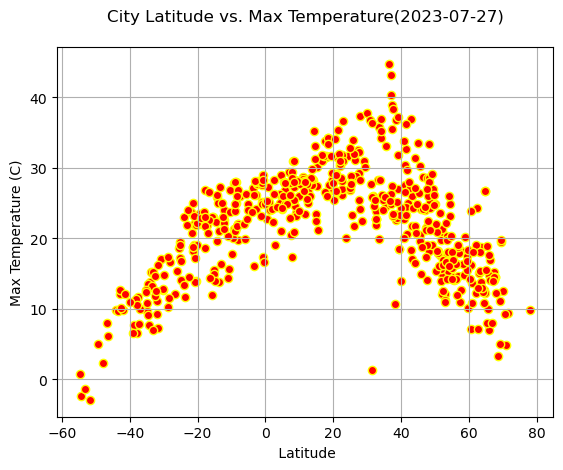

In [8]:
# Build scatter plot for latitude vs. temperature

lat=city_data_df['Lat']
temp=city_data_df['Max Temp']
t=datetime.date.today()


plt.scatter(lat, temp, marker='o', facecolors='red', edgecolors='yellow',alpha=1)
# Incorporate the other graph properties
plt.title( f'City Latitude vs. Max Temperature({t})\n')
plt.ylabel('Max Temperature (C)')
plt.xlabel(' Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

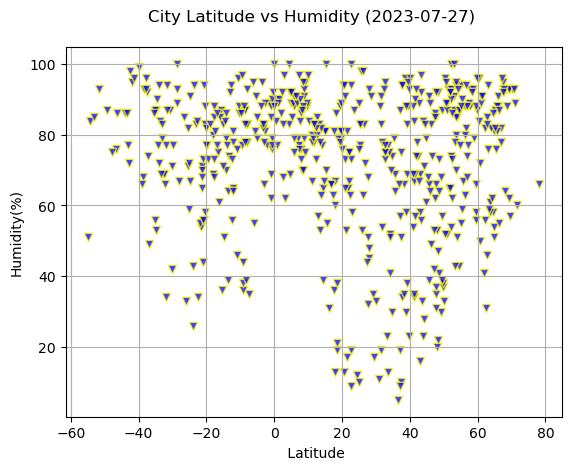

In [9]:
# Build the scatter plots for latitude vs. humidity
lat=city_data_df['Lat']
hum=city_data_df['Humidity']
t= datetime.date.today()
plt.scatter(lat, hum, marker='v', facecolors='blue', edgecolors='yellow',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'City Latitude vs Humidity ({t}) \n')
plt.ylabel('Humidity(%)')
plt.xlabel(' Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

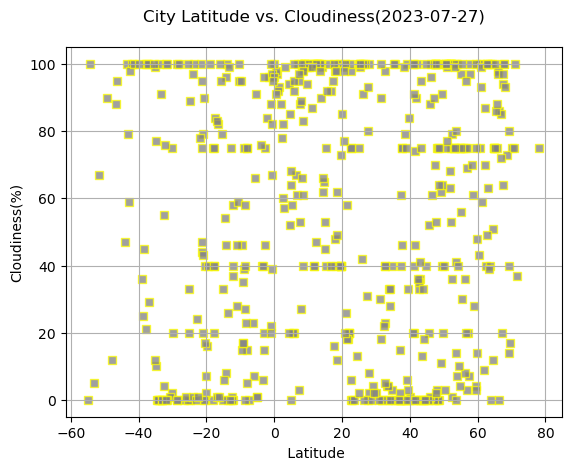

In [10]:
# Build the scatter plots for latitude vs.Cloudiness
lat=city_data_df['Lat']
cl=city_data_df['Cloudiness']
t= datetime.date.today()
plt.scatter(lat, cl, marker='s', facecolors='gray', edgecolors='yellow',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'City Latitude vs. Cloudiness({t})\n')
plt.ylabel('Cloudiness(%)')
plt.xlabel(' Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()





#### Latitude vs. Wind Speed Plot

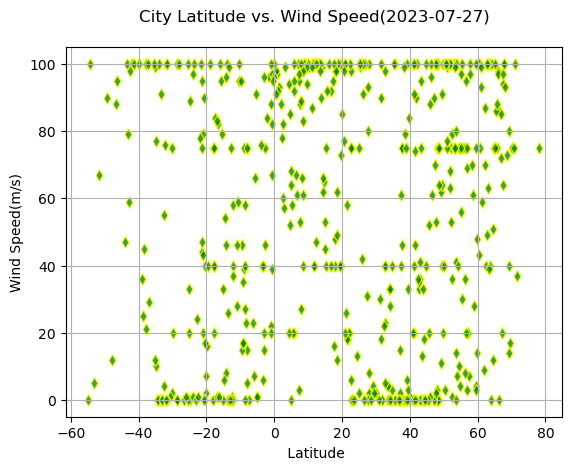

In [11]:
# Build the scatter plots for latitude vs. Wind Speed
# Build the scatter plots for latitude vs.Cloudiness
lat=city_data_df['Lat']
wind=city_data_df['Cloudiness']
t= datetime.date.today()
plt.scatter(lat, wind, marker='d', facecolors='green', edgecolors='yellow',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'City Latitude vs. Wind Speed({t})\n')
plt.ylabel('Wind Speed(m/s)')
plt.xlabel(' Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:

# Define a function to create Linear Regression plots
def regress_value(x_values, y_values,title,coordinats):
    r = scipy.stats.pearsonr(x_values, y_values)
    print(f"The r-value is: {r[0]}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values= x_values*slope+intercept
    
    line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
    plt.plot(x_values,regress_values,'green')
    plt.annotate(line_eq, coordinats,fontsize=15,color='red')
    
    plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='gray',alpha=0.75)
    
    plt.ylabel(title)
    
    plt.xlabel('Latitude')
   
   

   
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dinan,48.4167,-2.2500,18.18,92,100,3.10,FR,1690497610
2,nagqu,31.5000,92.0000,1.36,91,90,1.19,CN,1690497611
4,stanley,54.8680,-1.6985,16.61,87,75,3.60,GB,1690497041
5,vilyuchinsk,52.9306,158.4028,12.15,91,100,0.43,RU,1690497250
8,vorgashor,67.5833,63.9500,14.09,93,94,1.22,RU,1690497225


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,15.21,84,0,5.00,ZA,1690497200
3,port-aux-francais,-49.3500,70.2167,5.09,87,90,11.69,TF,1690497221
6,waitangi,-43.9535,-176.5597,9.90,86,47,3.13,NZ,1690497223
7,lorengau,-2.0226,147.2712,28.08,77,84,2.01,PG,1690497249
23,padre bernardo,-15.3500,-48.5000,23.00,36,79,2.09,BR,1690497613


###  Temperature vs. Latitude Linear Regression Plot

##### Temperature vs. Latitude Linear Regression Plot in the Northern Hemisphere

The r-value is: -0.6162997388869276


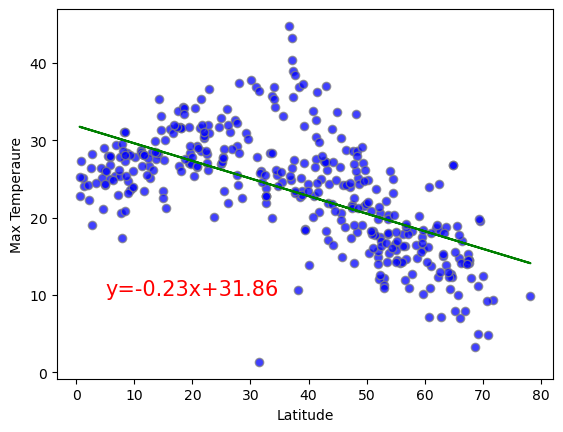

In [15]:
# Linear regression on Northern Hemisphere
lat=northern_hemi_df['Lat']
temp=northern_hemi_df['Max Temp']
# Call the function
regress_value(lat,temp,'Max Temperaure',(5,10))






##### Temperature vs. Latitude Linear Regression Plot in the Southern Hemisphere

The r-value is: 0.8561357211885592


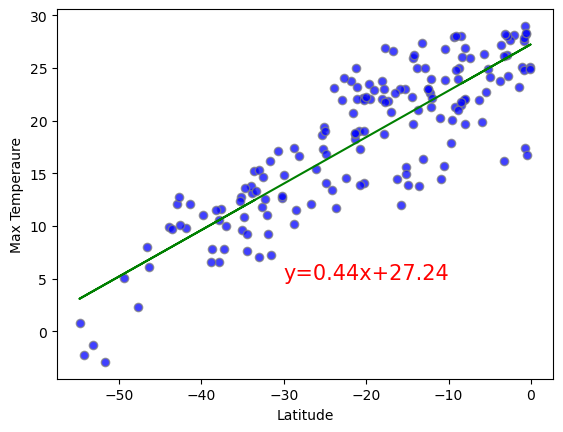

In [16]:
# Linear regression on Southern Hemisphere

lat=southern_hemi_df['Lat']
temp=southern_hemi_df['Max Temp']
# Call the function
regress_value(lat,temp,'Max Temperaure',(-30,5))


**Discussion about the linear relationship:
- There is a negative correlation between temperature and latitude with a negative correlation coefficient in the Northern Hemisphere.
- The r-value is between -0.7 and -0.5. The Temperature and Latitude are considered moderately correlated in the Northern Hemisphere. 

- There is a positive correlation between temperature and latitude with a positive correlation coefficient in the Southern Hemisphere.

- The r-value is higher than 0.7. The Temperature and Latitude are considered highly correlated in the Northern Hemisphere.

##### Example of Max temperatures in cities in the Southern Hemisphere on 7/27/23 :

Map that displays a point for some cities on Southern Hemisphere. The size of the points represents the Max temperature in each city.

<img src='lat.temp.png' style ='width:700px;height:300px'/> 
When we get closer to the equator (latitude = 0), the size of the points becomes bigger.

-->Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, around the world, it gets warmer towards the equator and cooler towards the poles

### Humidity vs. Latitude Linear Regression Plot

##### Humidity vs. Latitude Linear Regression Plot in the Northern Hemisphere

The r-value is: -0.013403277080392607


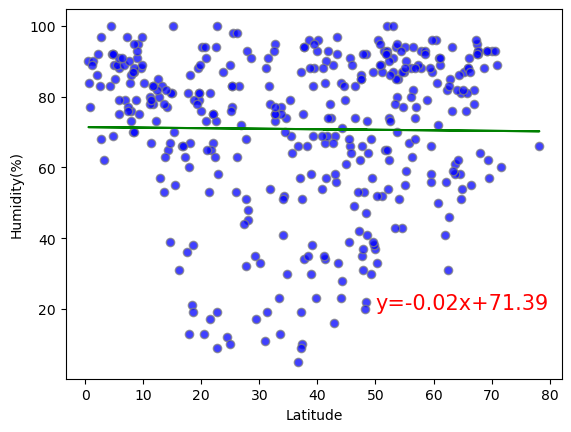

In [17]:
# Linear regression on Northern Hemisphere

lat=northern_hemi_df['Lat']
hum=northern_hemi_df['Humidity']
# Call the function
regress_value(lat,hum,'Humidity(%)',(50,20))


##### Humidity vs. Latitude Linear Regression Plot in the Southern Hemisphere

The r-value is: -0.02602389367511975


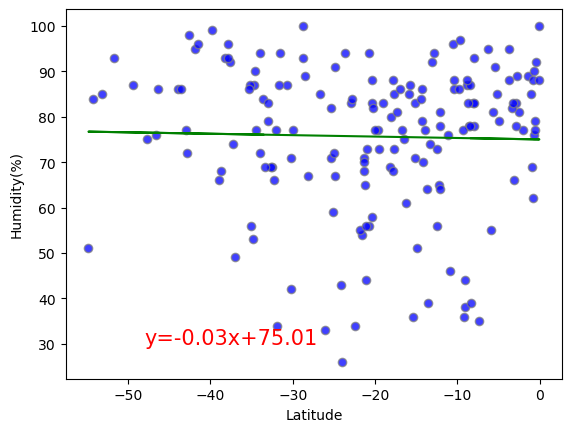

In [18]:
# Linear regression on southern Hemisphere

lat=southern_hemi_df['Lat']
hum=southern_hemi_df['Humidity']
# Call the function
regress_value(lat,hum,'Humidity(%)',(-48,30))


**Discussion about the linear relationship:

- The correlation between Humidity and Latitude is close to 0 in the Northern Hemisphere and Southern Hemisphere.

- The r-value is not significant. There is no correlation between Humidity and Latitude in the Northern Hemisphere and Southern Hemisphere.

- r- value is not significant; a regression analysis should never be done.

##### Example of Humidity in cities in the Southern Hemisphere on 7/27/23:

Map that displays a point for some cities in the Southern Hemisphere. The size of the points represents the Humidity in each city.

<img src='lat.hum.png' style ='width:700px;height:300px'/> 
The size of the points isn't dependent on the location as it relates to the equator.

--> Relative humidity is maximum near the equator, but decreases in subtropical areas and increases again in temperate regions. 




### Cloudiness vs. Latitude Linear Regression Plot

##### Cloudiness vs. Latitude Linear Regression Plot in the Northern Hemisphere

The r-value is: -0.08793619602137595


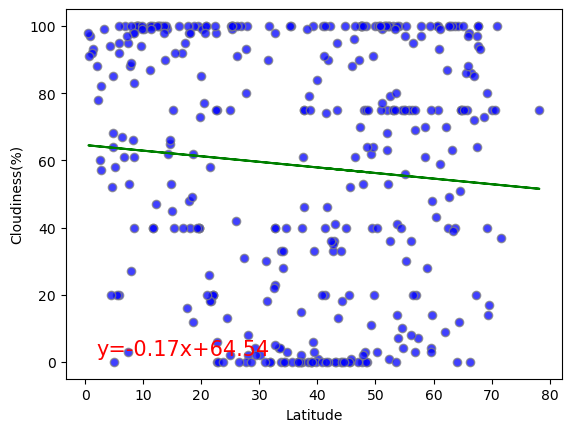

In [19]:
# Linear regression on Northern Hemisphere

lat=northern_hemi_df['Lat']
cl=northern_hemi_df['Cloudiness']
# Call the function
regress_value(lat,cl,'Cloudiness(%)',(2,2))


##### Cloudiness vs. Latitude Linear Regression Plot in the Southern Hemisphere

The r-value is: -0.03976681778984255


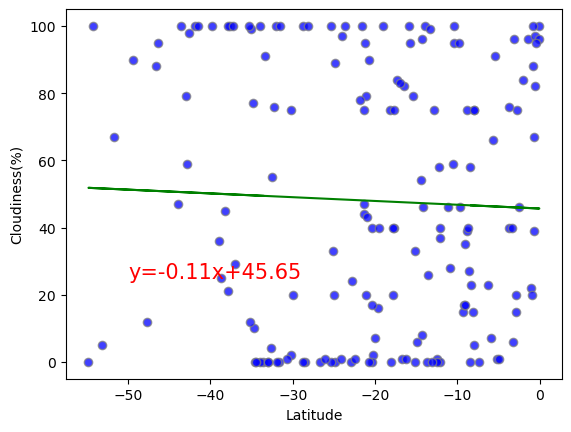

In [20]:
# Linear regression on Northern Hemisphere

lat=southern_hemi_df['Lat']
cl=southern_hemi_df['Cloudiness']
# Call the function
regress_value(lat,cl,'Cloudiness(%)',(-50,25))


**Discussion about the linear relationship

- The correlation between Humidity and Latitude is close to 0 in the Northern Hemisphere and Southern Hemisphere.

- The r-value is not significant. There is no correlation between Humidity and Latitude in the Northern Hemisphere and Southern Hemisphere.

- r- value is not significant; a regression analysis should never be done.

##### Example of Cloudiness in cities in the Southern Hemisphere on 7/27/23 :

Map that displays a point for some cities in the Southern Hemisphere. The size of the points represents the Cloudiness in each city.

<img src='lat.cl.png' style ='width:700px;height:300px'/> 
The size of the points isn't dependent on the location as it relates to the equator.

--> Cloudiness is not related to latitude. There is a high degree of variance in cloudiness across all latitudes, suggesting that latitude does not cause an area to be more or less cloudy.

### Wind Speed vs. Latitude Linear Regression Plot

##### Wind Speed vs. Latitude Linear Regression Plot in the Northern Hemisphere

The r-value is: -0.2520720402595933


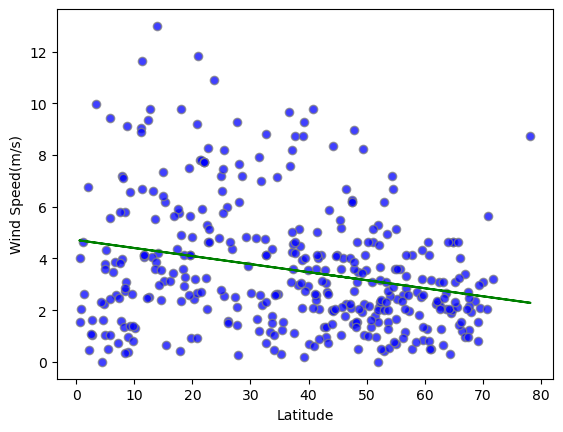

In [21]:
# Linear regression on Northern Hemisphere

lat=northern_hemi_df['Lat']
wind=northern_hemi_df['Wind Speed']
# Call the function
regress_value(lat,wind,'Wind Speed(m/s)',(10,14))


##### Wind Speed vs. Latitude Linear Regression Plot in the Southern Hemisphere

The r-value is: 0.09522808962457868


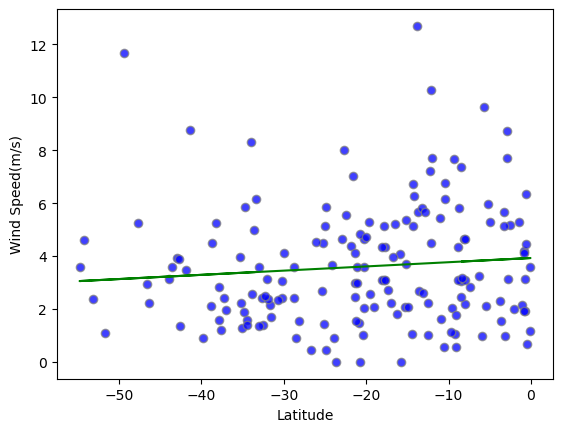

In [22]:
#Linear regression on Sourthern Hemisphere

lat=southern_hemi_df['Lat']
wind=southern_hemi_df['Wind Speed']
# Call the function
regress_value(lat,wind,'Wind Speed(m/s)',(-50,15))


**Discussion about the linear relationship:

The correlation between Wind Speed and Latitude is very weak on Northern Hemisphere and Southern Hemisphere.
The r-value is between -0.2 and 0. There is a very weak negative correlation between Wind Speed and Latitude on Northern Hemisphere and Southern Hemisphere.

##### Example of Wind Speed in cities in the Southern Hemisphere on 7/27/23:

Map that displays a point for some cities in the Southern Hemisphere. The size of the points represents the Wind speed in each city.

<img src='lat.wind.png' style ='width:700px;height:300px'/> 
The size of the points is not dependent on the location as it relates to the equator

--> The latitude can impact the direction of the wind, not the speed.